# 1)DATA PREPROCESSING


In [ ]:
# IMPORT LIBRARIES AND DATA SET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset=pd.read_csv('/content/otomoto_price_prediction_data.csv')

In [ ]:
dataset.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,audi,a6,2013,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0
1,skoda,fabia,2004,115000.0,1390.0,75.0,manual,petrol,0,1,8299.0
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,automatic,petrol,0,1,54500.0
3,bmw,seria-3,2013,155000.0,1995.0,163.0,automatic,diesel,0,0,62000.0
4,renault,talisman,2017,167000.0,1600.0,130.0,automatic,diesel,0,1,52999.0


In [ ]:
dataset.tail()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
206202,mercedes-benz,klasa-b,2018,18000.0,1991.0,211.0,automatic,petrol,0,1,89900.0
206203,honda,jazz,2020,2700.0,1498.0,97.0,automatic,hybrid,0,1,94900.0
206204,mitsubishi,l200,2015,225000.0,2477.0,178.0,manual,diesel,0,1,69900.0
206205,volkswagen,transporter,2006,232000.0,1900.0,105.0,manual,diesel,0,0,29900.0
206206,volkswagen,passat,2012,204000.0,1968.0,140.0,manual,diesel,0,1,30900.0


# DATA EXPLORATION

In [ ]:
dataset.shape

(206207, 11)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206207 entries, 0 to 206206
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   make             206207 non-null  object 
 1   model            206207 non-null  object 
 2   vehicle_year     206207 non-null  int64  
 3   mileage          204853 non-null  float64
 4   engine_capacity  204029 non-null  float64
 5   engine_power     204628 non-null  float64
 6   gearbox          204842 non-null  object 
 7   fuel_type        206207 non-null  object 
 8   damaged          206207 non-null  int64  
 9   is_business      206207 non-null  int64  
 10  target_price     206207 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 17.3+ MB


In [ ]:
dataset.select_dtypes(include='object').columns

Index(['make', 'model', 'gearbox', 'fuel_type'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

4

In [ ]:
dataset.select_dtypes(include='float64').columns

Index(['mileage', 'engine_capacity', 'engine_power', 'target_price'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include='float64').columns)

4

In [ ]:
# statstical summary
dataset.describe()

,vehicle_year,mileage,engine_capacity,engine_power,damaged,is_business,target_price
count,206207.000000,2.048530e+05,204029.000000,204628.000000,206207.000000,206207.000000,2.062070e+05
mean,2012.313855,6.656787e+05,1865.096922,151.300301,0.038059,0.600038,6.273519e+04
std,6.453940,2.040768e+08,708.559717,76.915073,0.191339,0.489891,8.604596e+04
min,1917.000000,1.000000e+00,400.000000,1.000000,0.000000,0.000000,6.000000e+02
25%,2008.000000,4.500000e+04,1461.000000,105.000000,0.000000,0.000000,1.799900e+04
50%,2013.000000,1.378500e+05,1797.000000,136.000000,0.000000,1.000000,3.590000e+04
75%,2017.000000,1.990000e+05,1997.000000,170.000000,0.000000,1.000000,7.490000e+04
max,2021.000000,9.060612e+10,8400.000000,1500.000000,1.000000,1.000000,5.250000e+06


# DEALING WITH MISSING VALUES

In [ ]:
dataset.isnull().values.any()

True

In [ ]:
dataset.isnull().values.sum()

6476

In [ ]:
dataset.columns[dataset.isnull().any()]

Index(['mileage', 'engine_capacity', 'engine_power', 'gearbox'], dtype='object')

In [ ]:
len(dataset.columns[dataset.isnull().any()])

4

In [ ]:
dataset.isnull().sum()

make                  0
model                 0
vehicle_year          0
mileage            1354
engine_capacity    2178
engine_power       1579
gearbox            1365
fuel_type             0
damaged               0
is_business           0
target_price          0
dtype: int64

In [ ]:
# columns with null values
dataset.columns[dataset.isnull().any()]

Index(['mileage', 'engine_capacity', 'engine_power', 'gearbox'], dtype='object')

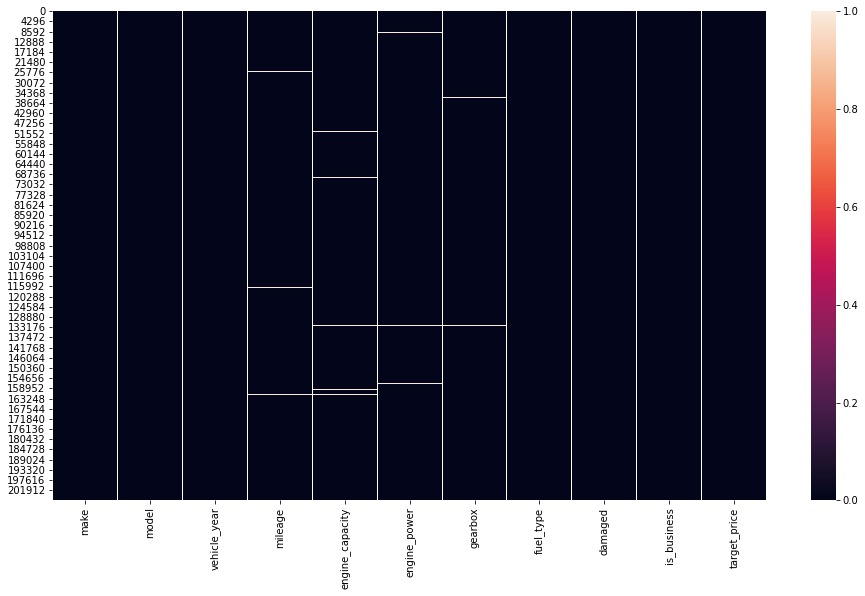

In [ ]:
# null values with heat5 map
plt.figure(figsize=[16,9])
sns.heatmap(dataset.isnull())
plt.show()

In [ ]:
dataset.shape


(206207, 11)

In [ ]:
nullpercent=dataset.isnull().sum()/dataset.shape[0]*100
nullpercent

make               0.000000
model              0.000000
vehicle_year       0.000000
mileage            0.656622
engine_capacity    1.056220
engine_power       0.765735
gearbox            0.661956
fuel_type          0.000000
damaged            0.000000
is_business        0.000000
target_price       0.000000
dtype: float64

In [ ]:
# columns to drop more than 50 % null values
cols_to_drop=nullpercent[nullpercent>50].keys()

In [ ]:
cols_to_drop

Index([], dtype='object')

In [ ]:
dataset.select_dtypes(include='float64').columns

Index(['mileage', 'engine_capacity', 'engine_power', 'target_price'], dtype='object')

In [ ]:
# add column means to numerical colums
dataset['mileage']=dataset['mileage'].fillna(dataset['mileage'].mean())




In [ ]:
dataset['engine_capacity']=dataset['engine_capacity'].fillna(dataset['engine_capacity'].mean())

In [ ]:
dataset['engine_power']=dataset['engine_power'].fillna(dataset['engine_power'].mean())

In [ ]:
dataset['damaged']=dataset['damaged'].fillna(dataset['damaged'].mean())

In [ ]:
dataset['is_business']=dataset['is_business'].fillna(dataset['is_business'].mean())

In [ ]:
dataset['target_price']=dataset['target_price'].fillna(dataset['target_price'].mean())

In [ ]:
len(dataset.columns[dataset.isnull().any()])

1

In [ ]:
# add columns mode to categoricalo columns
dataset.select_dtypes(include='object').columns

Index(['make', 'model', 'gearbox', 'fuel_type'], dtype='object')

In [ ]:
dataset.columns[dataset.isnull().any()]

Index(['gearbox'], dtype='object')

In [ ]:
dataset['gearbox']=dataset['gearbox'].fillna(dataset['gearbox'].mode()[0])

In [ ]:
dataset['make']=dataset['make'].fillna(dataset['make'].mode()[0])

In [ ]:
dataset['model']=dataset['model'].fillna(dataset['model'].mode()[0])

In [ ]:
dataset['fuel_type']=dataset['fuel_type'].fillna(dataset['fuel_type'].mode()[0])

In [ ]:
len(dataset.columns[dataset.isnull().any()])


0

In [ ]:
dataset.isnull().values.any()

False

# distplot

<Figure size 7200x1440 with 0 Axes>

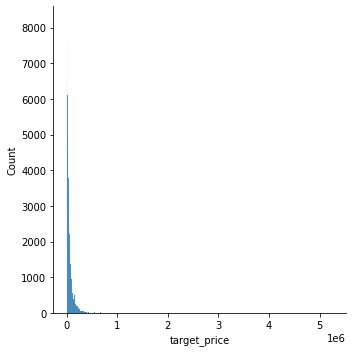

In [ ]:
# displot of target variable
plt.figure(figsize=[100,20])
bar=sns.displot(dataset['target_price'])
bar.legend:['skewness: {:.2f}'.format(dataset['target_price'].skew())]
plt.show()

In [ ]:
# correlation matrix
dataset_2=dataset.drop(columns='target_price')

In [ ]:
dataset_2.shape

(206207, 10)

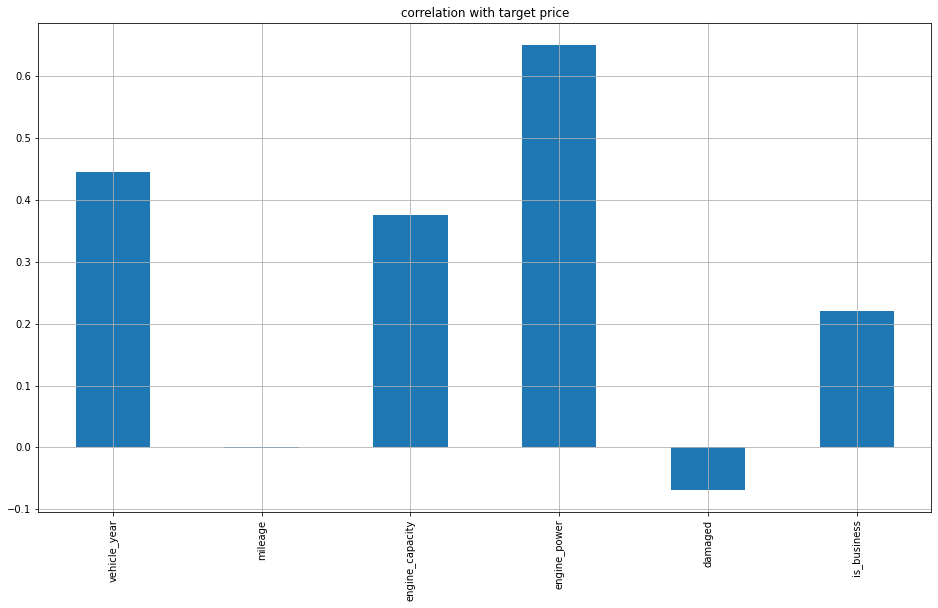

In [ ]:
dataset_2.corrwith(dataset['target_price']).plot.bar(
    figsize=(16,9),title='correlation with target price',grid=True
)

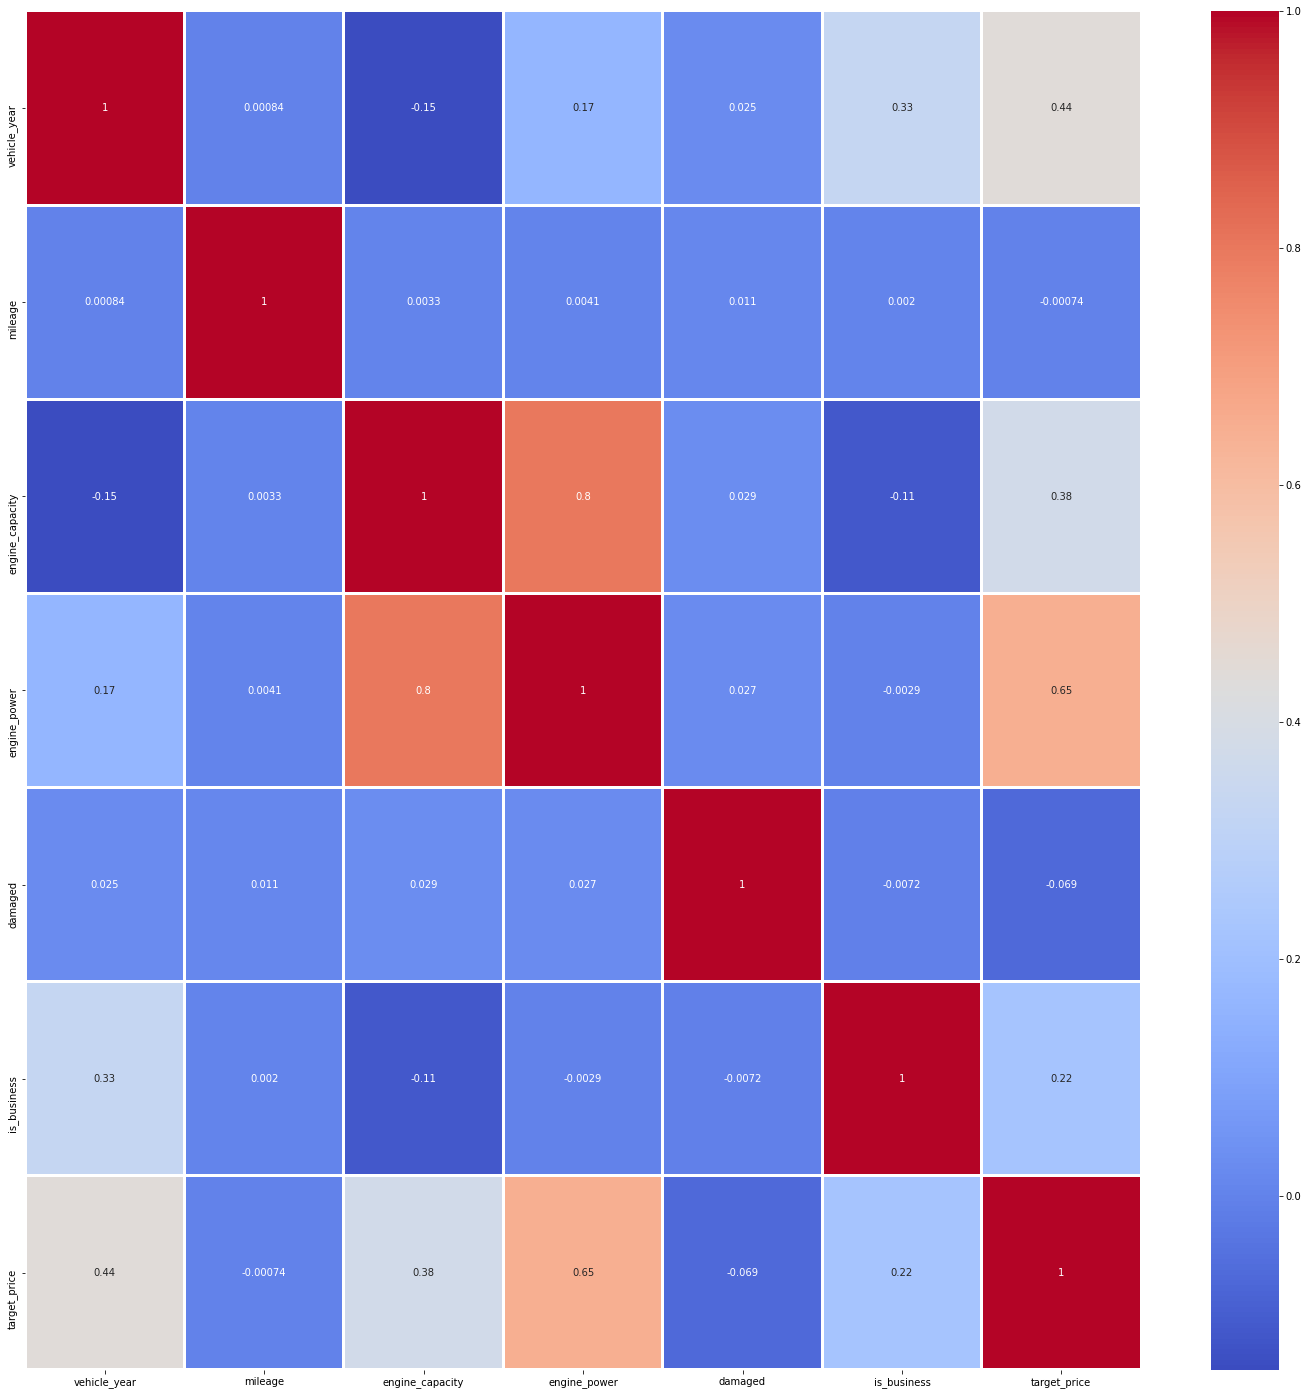

In [ ]:
# heatmap
plt.figure(figsize=(25,25))
ax=sns.heatmap(data=dataset.corr(),cmap='coolwarm',annot=True,linewidths=2)

In [ ]:
high_corr=dataset.corr()

In [ ]:
high_corr_features=high_corr.index[abs(high_corr['target_price'])>0.5]

In [ ]:
high_corr_features

Index(['engine_power', 'target_price'], dtype='object')

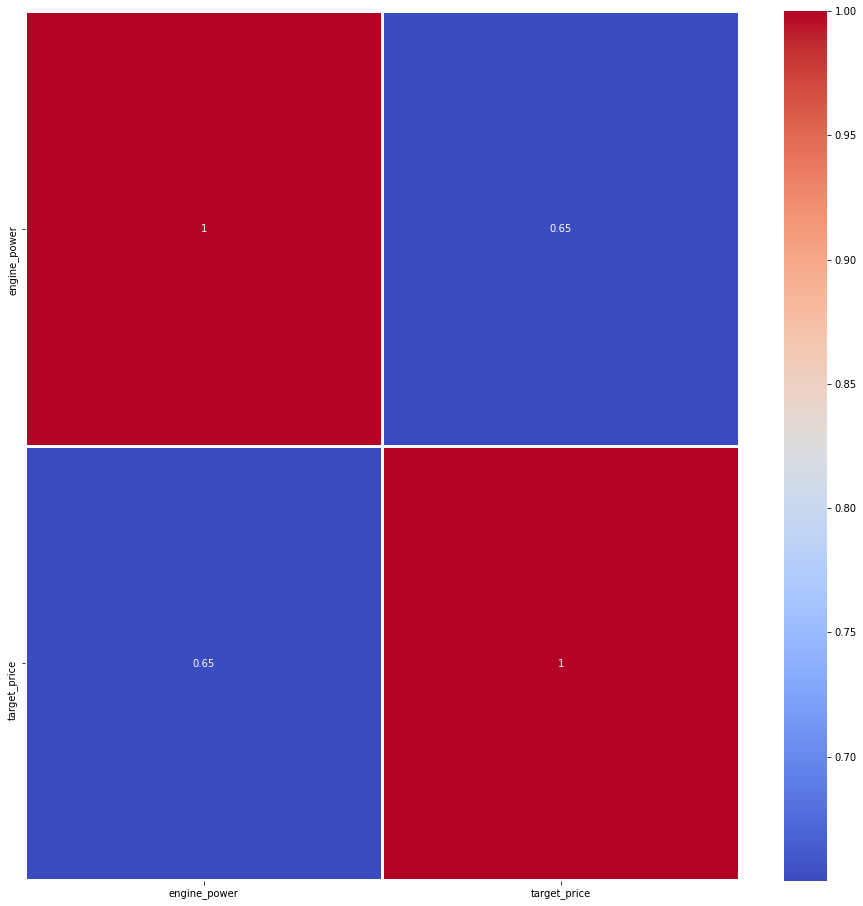

In [ ]:
plt.figure(figsize=(16,16))
ax=sns.heatmap(data=dataset[high_corr_features].corr(),cmap='coolwarm',annot=True,linewidths=2)

# dealing with categorical values

In [ ]:
dataset.shape

(206207, 11)

In [ ]:
dataset.select_dtypes(include='object').columns

Index(['make', 'model', 'gearbox', 'fuel_type'], dtype='object')

In [ ]:
dataset=pd.get_dummies(data=dataset,drop_first=True)

In [ ]:
dataset.shape

(206207, 1293)

In [ ]:
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

0

# splitting the dataset

In [ ]:
# independent variables
x=dataset.drop(columns='target_price')

In [ ]:
# target variable
y=dataset['target_price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

(164965, 1292)

In [ ]:
y_train.shape

(164965,)

In [ ]:
x_test.shape

(41242, 1292)

In [ ]:
y_test.shape

(41242,)

# FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [ ]:
x_train

array([[-2.68381416e+00,  2.31005402e-03, -3.80428178e-01, ...,
        -1.00630606e+00, -1.77571894e-02,  4.75787144e+00],
       [ 1.03681686e+00, -5.63499200e-03, -5.21013095e-01, ...,
         9.93733453e-01, -1.77571894e-02, -2.10178020e-01],
       [ 1.19184315e+00, -5.63499200e-03, -7.56741340e-01, ...,
         9.93733453e-01, -1.77571894e-02, -2.10178020e-01],
       ...,
       [ 1.19184315e+00, -5.63490148e-03,  1.46137624e+00, ...,
         9.93733453e-01, -1.77571894e-02, -2.10178020e-01],
       [-5.13446065e-01, -1.33549015e-03,  1.89011739e-01, ...,
         9.93733453e-01, -1.77571894e-02, -2.10178020e-01],
       [ 1.19184315e+00, -5.63456205e-03,  1.60196116e+00, ...,
        -1.00630606e+00, -1.77571894e-02, -2.10178020e-01]])

In [ ]:
x_test

array([[ 0.56879604, -0.00506622, -0.40142065, ..., -1.00490997,
        -0.01302915, -0.20581448],
       [-0.97739102, -0.00490259, -0.37596894, ...,  0.99511402,
        -0.01302915, -0.20581448],
       [ 0.10493992, -0.0048219 , -0.65876568, ...,  0.99511402,
        -0.01302915, -0.20581448],
       ...,
       [ 1.18727086, -0.00522758,  0.14437705, ..., -1.00490997,
        -0.01302915, -0.20581448],
       [ 0.25955863, -0.00504939,  2.45906835, ...,  0.99511402,
        -0.01302915, -0.20581448],
       [ 1.18727086, -0.00518779,  0.18679656, ..., -1.00490997,
        -0.01302915, -0.20581448]])

# model building

In [ ]:
# XGBoost regression
from xgboost import XGBRFRegressor
regression_xg=XGBRFRegressor()
regression_xg.fit(x_train,y_train)


[02:05:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [ ]:
y_pred=regression_xg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.7213254757519307